## Facial Emotion Recognition with CNN (FER-2013)
This project builds a Convolutional Neural Network (CNN) to classify facial emotions 
(such as Happy, Sad, Angry, Surprised, etc.) using the FER-2013 dataset.


In [11]:
!pip install tensorflow


### Import libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


In [13]:
import zipfile
import os

# Path to your zip file
zip_path = "FER2013.zip"

# Extract to a folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("fer2013")

print("Unzipped successfully!")


Unzipped successfully!


In [14]:
train_dir = "FER2013/train"
test_dir = "FER2013/test"


In [15]:
test_dir

'FER2013/test'

### Image Preprocessing
We preprocess the dataset using `ImageDataGenerator`:
- Rescale pixel values to the range [0,1]
- Convert images to grayscale (since FER-2013 is grayscale, 48x48)
- Create training and testing batches


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values (0–255) to (0–1)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),    # FER-2013 images are 48x48
    batch_size=64,
    color_mode="grayscale", # dataset is grayscale
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Step 4: Build the CNN Model
We will build a Convolutional Neural Network (CNN) for classifying facial emotions.  
The model will consist of:
- Convolutional layers for feature extraction  
- MaxPooling layers for down-sampling  
- Dropout for regularization  
- Dense layers for classification  

The final layer uses **softmax** activation since we have multiple classes (7 emotions).


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

num_classes = train_data.num_classes  
 # Automatically detects number of emotion classes

model = Sequential()

# Conv Layer 1
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Layer 2
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Layer 3
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flatten + Dense Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(num_classes, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,423,111 (5.43 MB)

 Trainable params: 1,421,703 (5.42 MB)

 Non-trainable params: 1,408 (5.50 KB)

### Step 5: Compile and Train the CNN Model
We will compile the model using:
- **loss**: categorical_crossentropy (multi-class classification)
- **optimizer**: Adam
- **metrics**: accuracy

Then we train the model on the training set and validate it on the test set.


## training on 30 epochs

In [18]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Train the model (fast mode on CPU)
history = model.fit(
    train_data,
    epochs=30,                 # small for now
    validation_data=test_data,
    steps_per_epoch=100,       # train only on 100 batches each epoch
    validation_steps=50,       # validate on 50 batches
    verbose=1
)

# Save model for later use
model.save("emotion_model.h5")
print("✅ Model saved as emotion_model.h5")


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.1825 - loss: 2.8895 - val_accuracy: 0.2494 - val_loss: 1.8530
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.2222 - loss: 2.6360 - val_accuracy: 0.2531 - val_loss: 2.0131
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 887ms/step - accuracy: 0.2395 - loss: 2.4653 - val_accuracy: 0.2550 - val_loss: 2.1417
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 741ms/step - accuracy: 0.2696 - loss: 2.3417 - val_accuracy: 0.2666 - val_loss: 2.2954
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 305ms/step - accuracy: 0.2873 - loss: 2.2758 - val_accuracy: 0.2844 - val_loss: 2.0990
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 619ms/step - accuracy: 0.2877 - loss: 2.2407 - val_accuracy: 0.3216 - val_loss: 1.9323
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 539ms/step - accuracy: 0.3047 - loss: 2.1513 - val_accuracy: 0.3784 - val_loss: 1.7166
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 484ms/step - accuracy: 0.3137 - loss: 2.086

✅ Model saved as emotion_model.h5


### accuracy score

In [20]:
# Evaluate model on the test dataset
test_loss, test_acc = model.evaluate(test_data)
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")


113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.5014 - loss: 1.3259
✅ Test Accuracy: 50.14%


### Testing the model

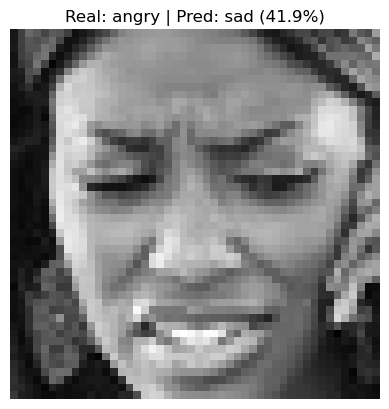

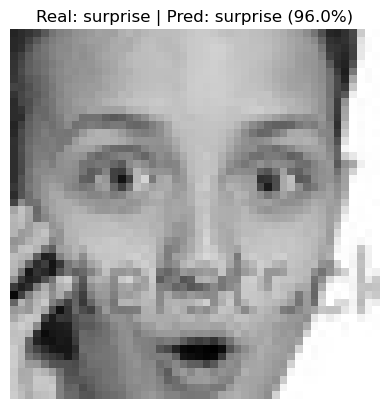

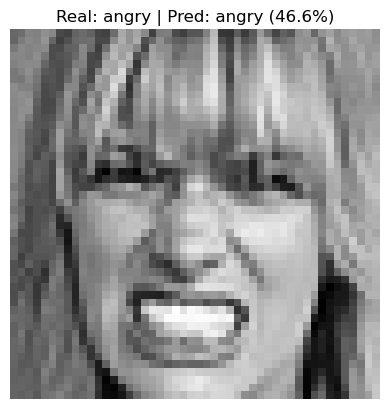

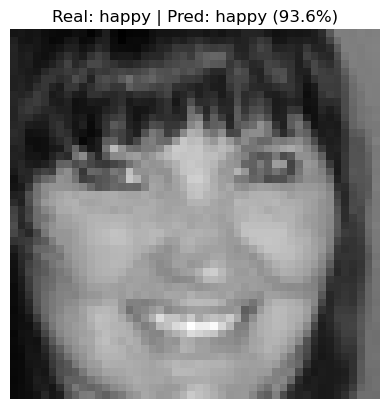

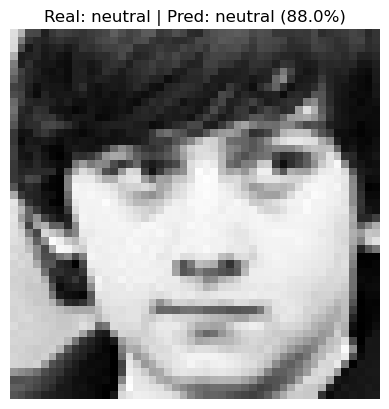

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Get class labels from training data
class_labels = list(train_data.class_indices.keys())

# Take a batch of images from test_data
test_images, test_labels = next(test_data)

# Show first 5 test images with true & predicted labels
for i in range(5):
    img = test_images[i]
    true_label = np.argmax(test_labels[i])

    # Predict
    pred = model.predict(np.expand_dims(img, axis=0), verbose=0)
    pred_label = np.argmax(pred)
    confidence = np.max(pred) * 100

    # Show image
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Real: {class_labels[true_label]} | Pred: {class_labels[pred_label]} ({confidence:.1f}%)")
    plt.axis("off")
    plt.show()
